# THE BATTLE OF NEIGHBORHOOD -- DATA SCIENCE PROJECT

# INTRODUCTION

<p>Bangalore, formally Bengaluru is the capital of the Indian territory of Karnataka. It has a population of more than ten million, making it a megacity and the third-most crowded city and fifth-most crowded urban agglomeration in India. It is situated in southern India, on the Deccan Plateau at a rise of more than 900 m (3,000 ft) above ocean level. Its multi-ethnic, multi-religious,[promotional language] and cosmopolitan character[promotional language] is reflected by its in excess of 1000 Hindu sanctuaries, 400 mosques, 100 holy places, 40 Jain Basadis, three Sikh gurdwaras, two Buddhist viharas and one Parsi fire sanctuary situated in a zone of 741 km² of the metropolis. The strict spots are additionally spoken to by the proposed Chabad of the Jewish people group. </p>

<p> Bengaluru is now and then alluded to as the "Silicon Valley of India" (or "IT capital of India") in view of its job as the country's driving data innovation (IT) exporter. Indian technological organisations ISRO, Infosys, Wipro and HAL are headquartered in the city. Bangalore is the second quickest developing significant city in India. Bengaluru has one of the most exceptionally instructed workforces on the planet. It is home to numerous instructive and research establishments.</p>

<p>With a population of 8,443,675 in the city and 10,456,000 in the urban agglomeration, up from 8.5 million at the 2011 evaluation, Bangalore is a megacity, and the third-most-crowded city in India and the eighteenth most-crowded city in the world. Bangalore was the quickest developing Indian city after New Delhi somewhere in the range of 1991 and 2001, with a development pace of 38% during the decade. Individuals from different states have moved to Bangalore. </p>

## CHALLENGES ADDRESSED IN THIS PROJECT:

 - 1. What is best area in Bangalore City for North Indian Cuisine? 
 - 2. Which zones have huge number of North Indian eatery Market? 
 - 3. Which all zones have less number of eatery? 
 - 4. Which is the best spot to remain on the off chance that I favor North Indian Cuisine? 
 - 5. What spots are have best café in Bangalore? 

## Source for DATA: 

 For this Analysis we need the accompanying information: 
 Bangalore restaurants information that contains list Locality, Restaurant name, rating alongside their scope and longitude. 
 -  Information source: Zomato kaggel dataset 
 -  Depiction: This informational collection contains the necessary data. Furthermore, we will utilize this informational index to investigate different region of Bangalore city. 

## Close by places in every area of Bangalore city:
 -  Information source: Fousquare API 
 -  Depiction: By utilizing this programming interface we will get all the settings in every area. 

## Procedure:
 -  Gather the Bangalore city information from Zomato kaggel dataset.
 -  Utilizing FourSquare API we will discover all settings for every area. 
 -  Channel out all settings that are close by territory. 
 -  Utilizing collection rating for every café to locate the best places. 
 -  Picture the Ranking of neighborhoods utilizing folium library (python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
!conda install -c conda-forge folium=0.5.0 --yes 
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

# All requested packages already installed.



## Read the zomato resturant data from csv file

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [6]:
df_country = df[df['Country Code'] == 1]
df_NDLS = df_country[df_country['City'] == 'Bangalore']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
3,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indir...",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
4,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiran...",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231


In [ ]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [8]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [9]:
df_Res.head(10)

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231
5,Glen's Bakehouse,Indiranagar,77.640625,12.979096,"Bakery, Desserts, Cafe",4.0,Very Good,3533
6,Onesta,Indiranagar,77.643685,12.978453,"Pizza, Cafe, Italian",4.3,Very Good,1413
7,Onesta,JP Nagar,77.596791,12.906229,"Pizza, Cafe, Italian",4.6,Excellent,781
8,ECHOES Koramangala,Koramangala 5th Block,77.615797,12.934179,"Continental, American, Italian, North Indian, ...",4.7,Excellent,276
9,Truffles,Koramangala 5th Block,77.614293,12.933298,"American, Burger, Cafe",4.7,Excellent,9667


### created map to show the restaurant cluters

In [13]:
Bangalore_Rest = folium.Map(location=[12.75, 77.25], zoom_start=10)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['green', 'red', 'yellow', 'orange','blue']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Bangalore_Rest)  

Bangalore_Rest

In [14]:
df_Res.head(10)

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416,0
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369,2
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934,2
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354,2
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231,2
5,Glen's Bakehouse,Indiranagar,77.640625,12.979096,"Bakery, Desserts, Cafe",4.0,Very Good,3533,2
6,Onesta,Indiranagar,77.643685,12.978453,"Pizza, Cafe, Italian",4.3,Very Good,1413,2
7,Onesta,JP Nagar,77.596791,12.906229,"Pizza, Cafe, Italian",4.6,Excellent,781,0
8,ECHOES Koramangala,Koramangala 5th Block,77.615797,12.934179,"Continental, American, Italian, North Indian, ...",4.7,Excellent,276,0
9,Truffles,Koramangala 5th Block,77.614293,12.933298,"American, Burger, Cafe",4.7,Excellent,9667,0


## 1. What is best area in Bangalore City for North Indian Cuisine? 

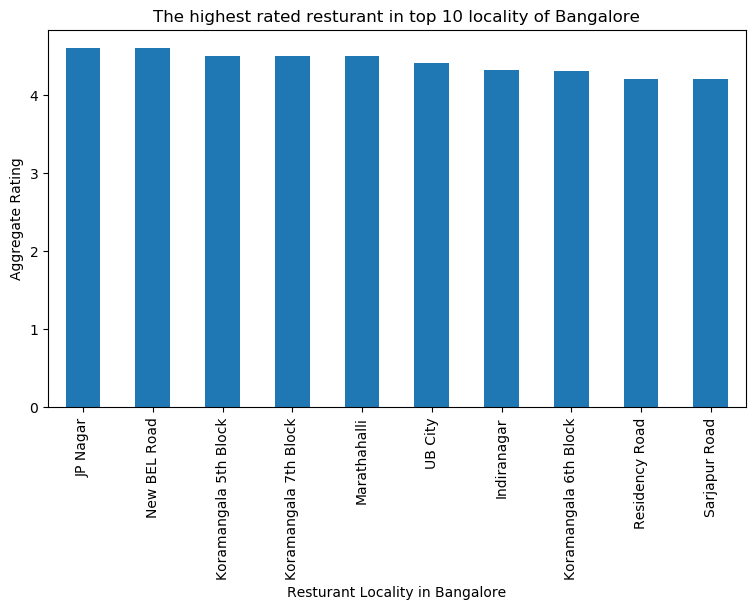

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

##### The best restaurants available in JP Nagar and New BEL Road

### Which is Worst hotel for Foodies

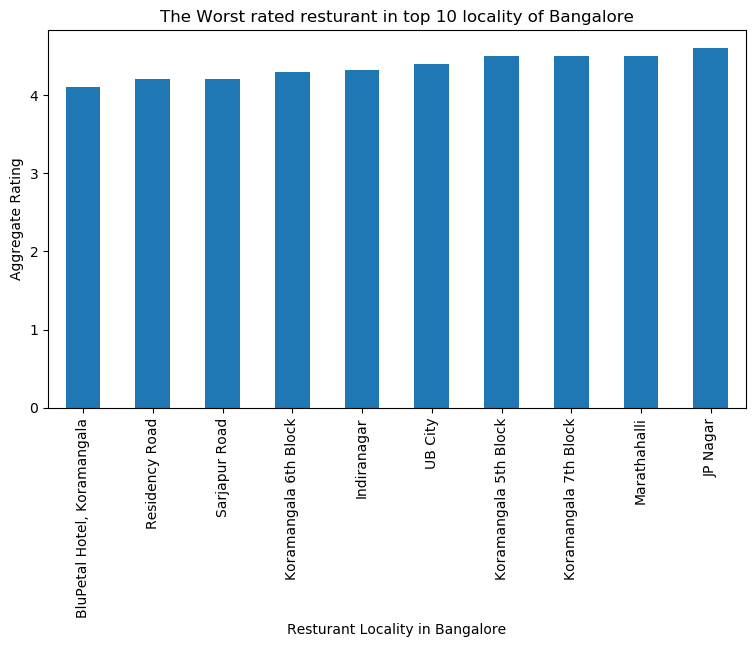

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Bangalore')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

##### The Worst zone & Restaurant for foodies is BluePetal Hotel in Koramanagala

## 2. Which zones have huge number of North Indian eatery Market? 

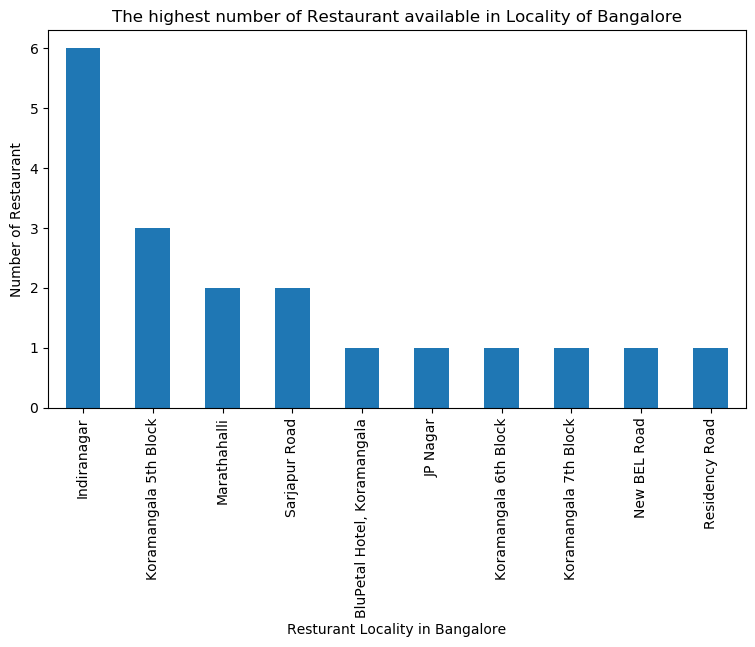

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

##### According to Analysis, Indira Nagar is the best place for North Indians for restaurants

## 3. Which all zones have less number of eatery? 

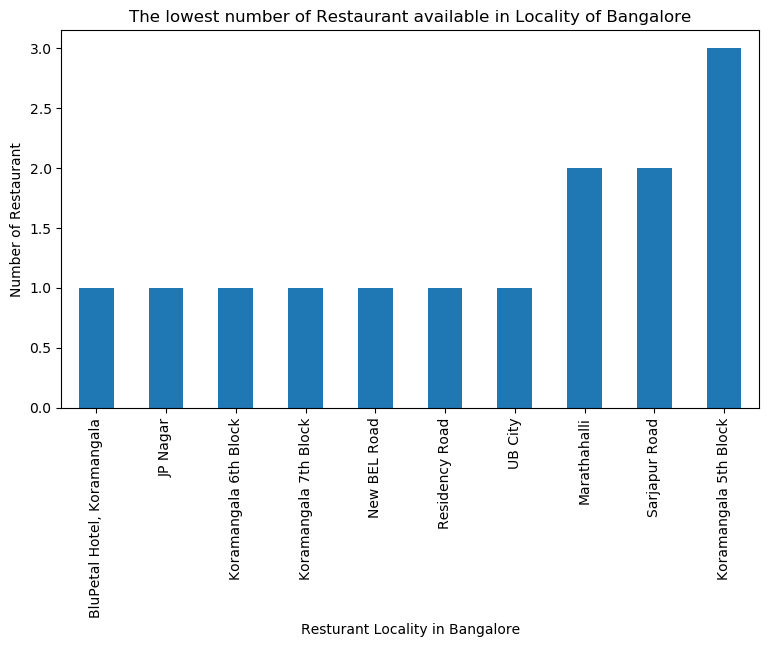

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Bangalore')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## 4. Which is the best spot to remain on the off chance that I favor North Indian Cuisine?

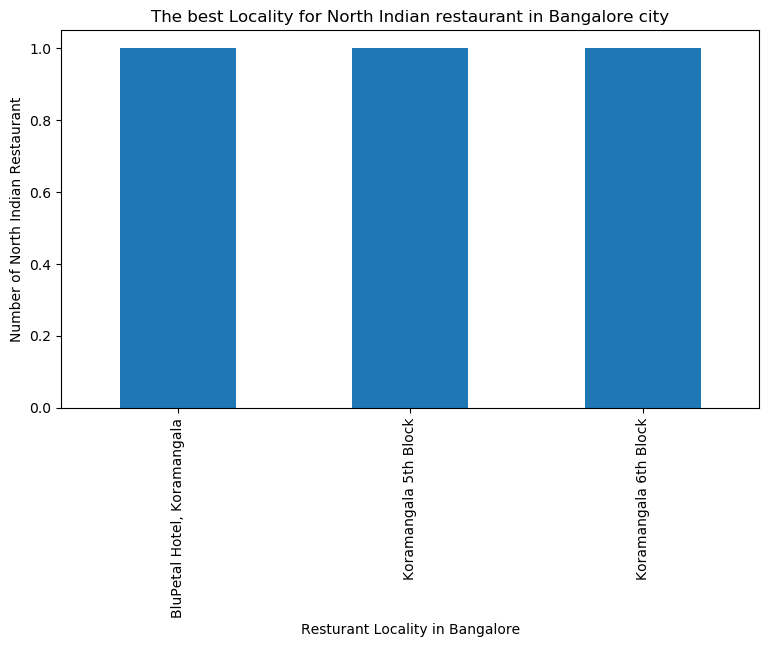

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for North Indian restaurant in Bangalore city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('North Indian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Number of North Indian Restaurant')

#displays the plot
plt.show()

##### Koramanagala 5th Block and 6th Block are the best place for North Indian cuisines. 

## Data Transformation

In [35]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [36]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753


In [37]:
df_final.shape

(11, 8)

### Define Foursquare Credentials and Version

In [38]:
CLIENT_ID = 'MG5YS4W02RSKAKMXJLLJ55D3BEX55QTRHYRVGBF0G1RPNDQD' # Foursquare ID
CLIENT_SECRET = 'JD2NED0GQWZC1G0VDCV2CD3ONPCKQFEEH4OSQA11DXZVRIYD' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MG5YS4W02RSKAKMXJLLJ55D3BEX55QTRHYRVGBF0G1RPNDQD
CLIENT_SECRET:JD2NED0GQWZC1G0VDCV2CD3ONPCKQFEEH4OSQA11DXZVRIYD


### Creating a function

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Defining and finding the venues in Bangalore

In [42]:
# find the venues in all Bangalore Locality
Bangalore_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

BluPetal Hotel, Koramangala
Indiranagar
JP Nagar
Koramangala 5th Block
Koramangala 6th Block
Koramangala 7th Block
Marathahalli
New BEL Road
Residency Road
Sarjapur Road
UB City


In [43]:
Bangalore_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
1,"BluPetal Hotel, Koramangala",12.933284,77.615428,Gilly's Rest-O-Bar,12.932987,77.614755,Bar
2,"BluPetal Hotel, Koramangala",12.933284,77.615428,Stoner,12.932759,77.614132,Ice Cream Shop
3,"BluPetal Hotel, Koramangala",12.933284,77.615428,XOOX Brewmill,12.935507,77.614982,Brewery
4,"BluPetal Hotel, Koramangala",12.933284,77.615428,Khawa Karpo,12.934051,77.616640,Chinese Restaurant


In [44]:
Bangalore_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"BluPetal Hotel, Koramangala",100,100,100,100,100,100
Indiranagar,62,62,62,62,62,62
JP Nagar,35,35,35,35,35,35
Koramangala 5th Block,100,100,100,100,100,100
Koramangala 6th Block,23,23,23,23,23,23
Koramangala 7th Block,82,82,82,82,82,82
Marathahalli,8,8,8,8,8,8
New BEL Road,32,32,32,32,32,32
Residency Road,100,100,100,100,100,100


In [46]:
print('There are {} uniques categories.'.format(len(Bangalore_venues['Venue Category'].unique())))

There are 112 uniques categories.


In [47]:
## Analyze Each Locality

# one hot encoding
Bangalore_onehot = pd.get_dummies(Bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Bangalore_onehot['Locality'] = Bangalore_venues['Locality'] 

# move Locality column to the first column
column_list = Bangalore_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Bangalore_onehot = Bangalore_onehot[column_list]

Bangalore_onehot.head()

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Udupi Restaurant,Vegetarian / Vegan Restaurant,Women's Store
0,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Bangalore_grouped = Bangalore_onehot.groupby('Locality').mean().reset_index()
Bangalore_grouped

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Udupi Restaurant,Vegetarian / Vegan Restaurant,Women's Store
0,"BluPetal Hotel, Koramangala",0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.020000,0.030000,...,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,Indiranagar,0.000000,0.000000,0.00,0.016129,0.000000,0.000000,0.000000,0.032258,0.032258,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.016129,0.016129,0.016129
2,JP Nagar,0.000000,0.028571,0.00,0.000000,0.000000,0.000000,0.028571,0.028571,0.057143,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,Koramangala 5th Block,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.010000,0.030000,...,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,Koramangala 6th Block,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043478,0.000000,0.00,0.000000,0.043478,0.000000,0.00000,0.000000,0.043478,0.000000
5,Koramangala 7th Block,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.012195,0.024390,0.024390,...,0.012195,0.000000,0.00,0.012195,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,Marathahalli,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
7,New BEL Road,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.031250,0.000000,0.031250,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.03125,0.000000,0.000000,0.000000
8,Residency Road,0.000000,0.020000,0.01,0.000000,0.000000,0.010000,0.000000,0.010000,0.060000,...,0.000000,0.000000,0.01,0.010000,0.000000,0.000000,0.00000,0.000000,0.010000,0.000000
9,Sarjapur Road,0.058824,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [49]:
Bangalore_grouped.shape

(11, 113)

In [52]:
num_top_venues = 5

for hood in Bangalore_grouped['Locality']:
    print("----"+hood+"----")
    temp = Bangalore_grouped[Bangalore_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BluPetal Hotel, Koramangala----
                  venue  freq
0     Indian Restaurant  0.16
1    Chinese Restaurant  0.06
2                  Café  0.05
3          Dessert Shop  0.04
4  Fast Food Restaurant  0.04


----Indiranagar----
               venue  freq
0               Café  0.15
1  Indian Restaurant  0.13
2                Pub  0.08
3             Lounge  0.05
4        Pizza Place  0.05


----JP Nagar----
               venue  freq
0  Indian Restaurant  0.09
1               Café  0.09
2        Coffee Shop  0.06
3                Bar  0.06
4        Pizza Place  0.06


----Koramangala 5th Block----
                  venue  freq
0     Indian Restaurant  0.17
1    Chinese Restaurant  0.06
2                  Café  0.05
3          Dessert Shop  0.04
4  Fast Food Restaurant  0.04


----Koramangala 6th Block----
                  venue  freq
0           Pizza Place  0.13
1                  Café  0.09
2        Ice Cream Shop  0.04
3              Tea Room  0.04
4  Fast Food Restaurant  

In [53]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Bangalore_grouped['Locality']

for ind in np.arange(Bangalore_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Dessert Shop,Restaurant,Lounge,Coffee Shop,Bar,Bookstore
1,Indiranagar,Café,Indian Restaurant,Pub,Pizza Place,Dessert Shop,Chinese Restaurant,Lounge,Ice Cream Shop,Bakery,Bar
2,JP Nagar,Café,Indian Restaurant,Bar,Pizza Place,Coffee Shop,Department Store,Pub,Chinese Restaurant,Cosmetics Shop,Multiplex
3,Koramangala 5th Block,Indian Restaurant,Chinese Restaurant,Café,Lounge,Dessert Shop,Fast Food Restaurant,Restaurant,Coffee Shop,Bar,Bookstore
4,Koramangala 6th Block,Pizza Place,Café,Italian Restaurant,Fast Food Restaurant,Lounge,Seafood Restaurant,Food Court,Clothing Store,South Indian Restaurant,Pub
5,Koramangala 7th Block,Indian Restaurant,Dessert Shop,Chinese Restaurant,Café,Lounge,Bookstore,Bar,Snack Place,Donut Shop,Multiplex
6,Marathahalli,Indian Restaurant,Pizza Place,Dessert Shop,Clothing Store,Chinese Restaurant,Café,Financial or Legal Service,Cupcake Shop,Deli / Bodega,Department Store
7,New BEL Road,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Pizza Place,Bar,Burger Joint,Mexican Restaurant,Coffee Shop,Sandwich Place
8,Residency Road,Café,Indian Restaurant,Pub,Bar,Coffee Shop,Hotel,Clothing Store,Donut Shop,Chinese Restaurant,Pizza Place
9,Sarjapur Road,Café,South Indian Restaurant,Brewery,Afghan Restaurant,Ice Cream Shop,Indian Restaurant,Liquor Store,Lounge,Eastern European Restaurant,Pizza Place


In [55]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Bangalore_clustering = Bangalore_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(11,)

In [57]:
# add clustering labels
Bangalore_merged = df_final.head(240)
Bangalore_merged['Cluster Labels'] = kmeans.labels_

# merge Bangalore_grouped with df_North_Indian to add latitude/longitude for each Locality
Bangalore_merged = Bangalore_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Bangalore_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416,1,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Dessert Shop,Restaurant,Lounge,Coffee Shop,Bar,Bookstore
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834,1,Café,Indian Restaurant,Pub,Pizza Place,Dessert Shop,Chinese Restaurant,Lounge,Ice Cream Shop,Bakery,Bar
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781,1,Café,Indian Restaurant,Bar,Pizza Place,Coffee Shop,Department Store,Pub,Chinese Restaurant,Cosmetics Shop,Multiplex
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328,1,Indian Restaurant,Chinese Restaurant,Café,Lounge,Dessert Shop,Fast Food Restaurant,Restaurant,Coffee Shop,Bar,Bookstore
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753,4,Pizza Place,Café,Italian Restaurant,Fast Food Restaurant,Lounge,Seafood Restaurant,Food Court,Clothing Store,South Indian Restaurant,Pub


In [58]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Lat'], Bangalore_merged['Lng'], Bangalore_merged['Locality'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [59]:
## Examine Clusters

## Cluster 1
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,12.913652,4.2,"Excellent, Good",6110,0,Café,South Indian Restaurant,Brewery,Afghan Restaurant,Ice Cream Shop,Indian Restaurant,Liquor Store,Lounge,Eastern European Restaurant,Pizza Place


In [60]:
## Examine Clusters

## Cluster 2
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[1] + list(range(5,Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12.933284,4.100000,Very Good,2416,1,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Dessert Shop,Restaurant,Lounge,Coffee Shop,Bar,Bookstore
1,12.976278,4.316667,"Excellent, Good, Very Good",19834,1,Café,Indian Restaurant,Pub,Pizza Place,Dessert Shop,Chinese Restaurant,Lounge,Ice Cream Shop,Bakery,Bar
2,12.906229,4.600000,Excellent,781,1,Café,Indian Restaurant,Bar,Pizza Place,Coffee Shop,Department Store,Pub,Chinese Restaurant,Cosmetics Shop,Multiplex
3,12.933947,4.500000,"Excellent, Very Good",15328,1,Indian Restaurant,Chinese Restaurant,Café,Lounge,Dessert Shop,Fast Food Restaurant,Restaurant,Coffee Shop,Bar,Bookstore
5,12.935662,4.500000,Excellent,1288,1,Indian Restaurant,Dessert Shop,Chinese Restaurant,Café,Lounge,Bookstore,Bar,Snack Place,Donut Shop,Multiplex
8,12.972532,4.200000,Very Good,334,1,Café,Indian Restaurant,Pub,Bar,Coffee Shop,Hotel,Clothing Store,Donut Shop,Chinese Restaurant,Pizza Place


In [61]:
## Examine Clusters

## Cluster 3
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,13.029198,4.6,Excellent,627,2,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Pizza Place,Bar,Burger Joint,Mexican Restaurant,Coffee Shop,Sandwich Place


In [62]:
## Examine Clusters

## Cluster 4
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] ==3 , Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,12.962655,4.5,"Excellent, Very Good",7890,3,Indian Restaurant,Pizza Place,Dessert Shop,Clothing Store,Chinese Restaurant,Café,Financial or Legal Service,Cupcake Shop,Deli / Bodega,Department Store


In [63]:
## Examine Clusters

## Cluster 5
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 4, Bangalore_merged.columns[[1] + list(range(5, Bangalore_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,12.939496,4.3,Very Good,753,4,Pizza Place,Café,Italian Restaurant,Fast Food Restaurant,Lounge,Seafood Restaurant,Food Court,Clothing Store,South Indian Restaurant,Pub
10,12.972161,4.4,Very Good,754,4,Italian Restaurant,Mexican Restaurant,Café,Lounge,Coffee Shop,Restaurant,Electronics Store,Hotel,Clothing Store,Pizza Place


## Conclusion:

- Koramanagala 5th & 6th Block are have best neighborhood of North Indian Restaurants
- Koramanagala 6th block has best restaurant as per the ratings.
- Indira Nagar is best place for foodies.
- JP nagar, New BEL road , Koramangalam Marthali have best restaurants in Bangalore.

### Cluster 1: 

<p>This zone is recommended for Cafes </p>

### Cluster 2:

<p>This zone is recommended for Indian Restaurants </p>

### Cluster 3: 

<p>This zone is recommended for Ice Cream shops and Fast food Restaurants </p>

### Cluster 4:

<p>This zone is recommended for  Pubs and Night clubs </p>

### Cluster 5: 

<p>This zone is recommended for Italian and Mexican Restaurants </p>